<a href="https://colab.research.google.com/github/erickgt00/PD_MCD/blob/main/Practica7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica 2

Análisis inicial de los Datos.

In [64]:
# Librerias a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('train.csv')

## Simple vista a los Datos

In [66]:
df.shape

(614, 13)

In [67]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Tenemos variables categóricas (YES, NO)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Tenemos información incompleta, iremos trabajando la base durante el proyecto

In [69]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Aqui describimos los datos númericos

In [70]:
# Vamos a cambiar el tipo de dato de Credit_History a objeto

df['Credit_History'] = df['Credit_History'].astype('O')

In [71]:
# Vamos a describir los datos categóricos

df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [72]:
# Vamos a quitar el ID porque no es importante para el modelo

df.drop('Loan_ID', axis=1, inplace=True)

In [73]:
df.duplicated().any()


False

No tenemos duplicados

In [74]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


The percentage of Y class : 0.69
The percentage of N class : 0.31


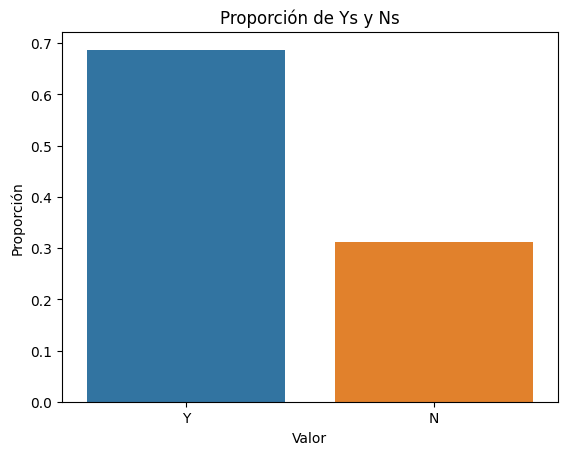

In [75]:
proporcion = df['Loan_Status'].value_counts(normalize=True)
sns.barplot(x=proporcion.index, y=proporcion.values)
plt.xlabel('Valor')
plt.ylabel('Proporción')
plt.title('Proporción de Ys y Ns')
print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))
plt.show()

Como podemos ver en este principal análisis los datos necesitan ser tratados antes de realizar un modelo. Podemos ver que en nuestra variable de interes (Si le darán un crédito o no) un 30% de las personas no son aprovadas para tener un crédito.

## Práctica 3

Visualización de los datos

In [76]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Vamos a trabajar primero con las columnas de categorías

In [77]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


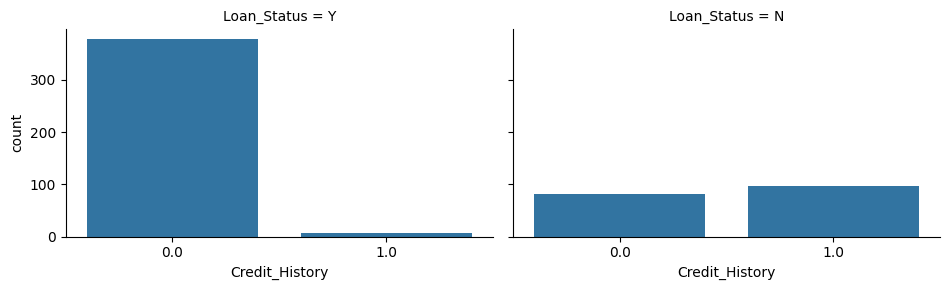

In [78]:
# Credit_History

grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

No otorgamos un préstamo a la mayoría de las personas con Historial de Crédito = 0
Pero sí otorgamos un préstamo a la mayoría de las personas con Historial de Crédito = 1
Por lo tanto, podemos decir que si tienes Historial de Crédito = 1, tendrás una mejor probabilidad de obtener un préstamo.

Esto se convierte en una característica importante.

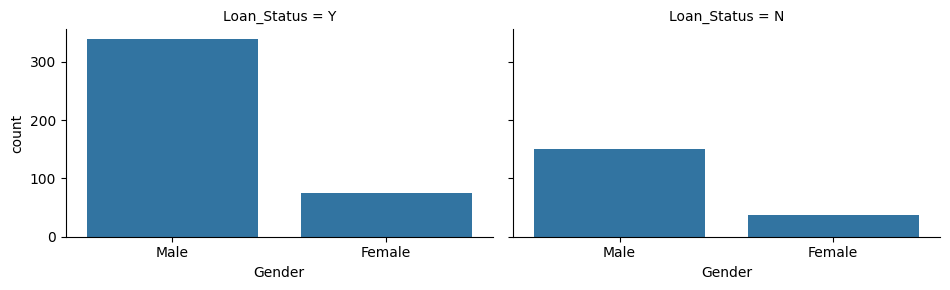

In [79]:
# Gender

grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Gender');


La mayoría de los hombres obtuvieron un préstamo y la mayoría de las mujeres también lo hicieron, así que no hay un patrón claro. Creo que esta característica no es tan importante; lo veremos más adelante.

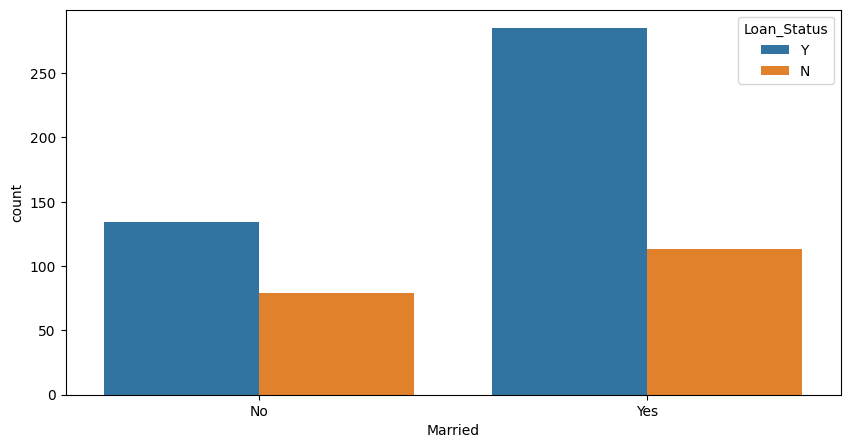

In [80]:
# Married

plt.figure(figsize=(10,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);


La mayoría de las personas que se casan obtuvieron un préstamo. Si estás casado, ¡tienes una mejor probabilidad de obtener un préstamo! ¡Buena característica!

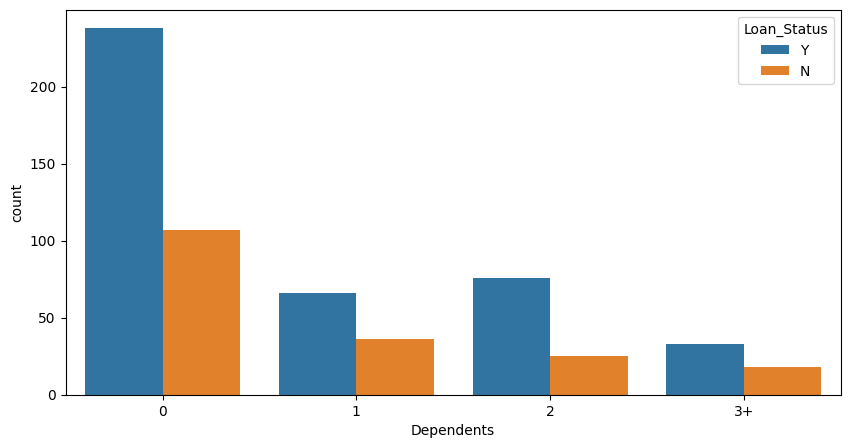

In [81]:
# Dependents

plt.figure(figsize=(10,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

Si el número de dependientes es igual a 0, tenemos una probabilidad mucho mayor de obtener un préstamo (muy alta probabilidad). Buena característica.

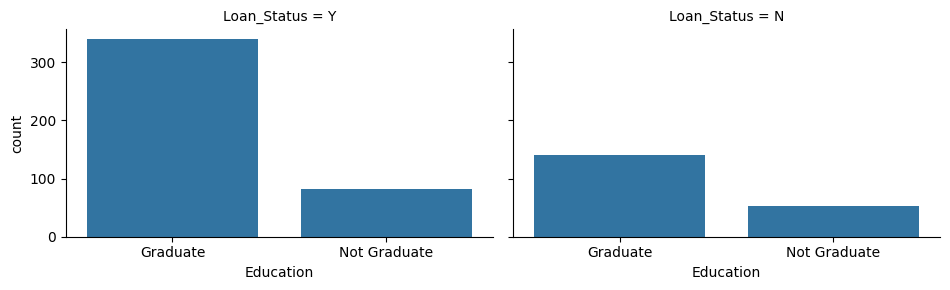

In [82]:
# Education

grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Education');


Si estás graduado o no, tendrás casi la misma probabilidad de obtener un préstamo (no hay un patrón claro). Aquí puedes ver que la mayoría de las personas se graduaron y la mayoría de ellas obtuvieron un préstamo. Por otro lado, la mayoría de las personas que no se graduaron también obtuvieron un préstamo, pero con un porcentaje menor que las personas que se graduaron. No es una característica importante.

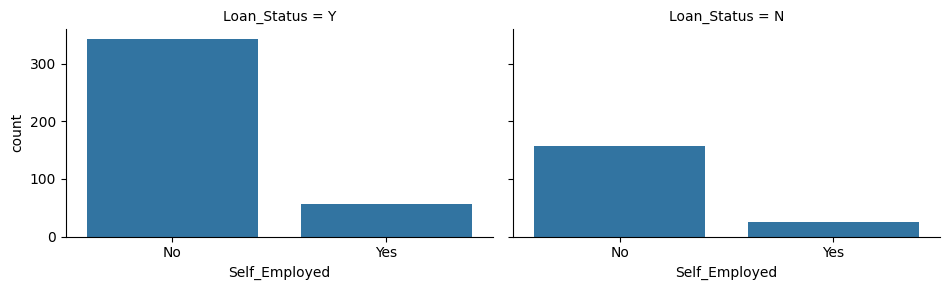

In [83]:
# Self_Employed

grid = sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

No hay un patrón (igual que con la Educación)

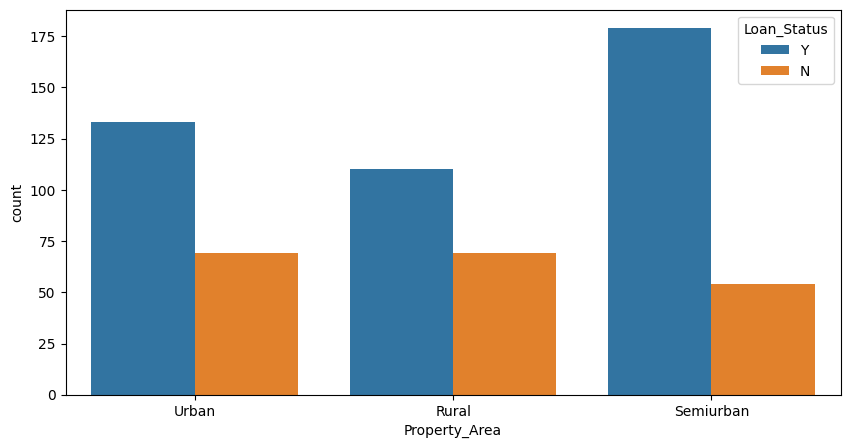

In [84]:
# Property_Area

plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);


Podemos decir que la zona de propiedad Semiurbana tiene más del 50% de probabilidad de obtener un préstamo. Buena característica.

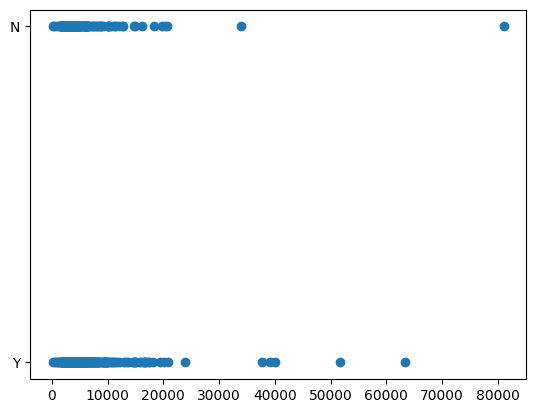

In [85]:
# ApplicantIncome

plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

Sin patron

Ahora observaremos las columnas numericas

In [86]:
df.groupby('Loan_Status').median() #la mediana para que no se vea afectada con los outliers


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


Podemos observar que cuando tenemos un ingreso medio bajo en CoapplicantIncome, obtenemos Loan_Status = N. Por lo tanto, CoapplicantIncome es una buena característica.

## Práctica 4

In [87]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Correlación entre los datos

In [88]:
correlation_matrix = df.corr(method='pearson')

In [89]:
print(correlation_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   

                   Loan_Amount_Term  
ApplicantIncome           -0.045306  
CoapplicantIncome         -0.059878  
LoanAmount                 0.039447  
Loan_Amount_Term           1.000000  


In [90]:
from tabulate import tabulate

In [91]:
tabla_latex = tabulate(correlation_matrix, headers='keys', tablefmt='latex')

print(tabla_latex)

\begin{tabular}{lrrrr}
\hline
                   &   ApplicantIncome &   CoapplicantIncome &   LoanAmount &   Loan\_Amount\_Term \\
\hline
 ApplicantIncome   &         1         &           -0.116605 &    0.570909  &         -0.0453061 \\
 CoapplicantIncome &        -0.116605  &            1        &    0.188619  &         -0.059878  \\
 LoanAmount        &         0.570909  &            0.188619 &    1         &          0.0394473 \\
 Loan\_Amount\_Term  &        -0.0453061 &           -0.059878 &    0.0394473 &          1         \\
\hline
\end{tabular}


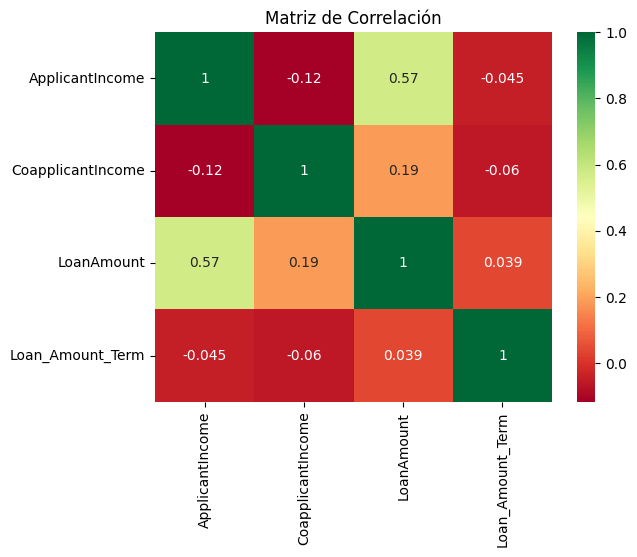

In [92]:
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Matriz de Correlación')
plt.show()


**ApplicantIncome vs CoapplicantIncome:**

* Correlación: -0.116605
* Interpretación: Hay una correlación negativa leve entre el ingreso del solicitante y el ingreso del coaplicante. Esto sugiere que a medida que el ingreso del solicitante aumenta, tiende a haber una ligera disminución en el ingreso del coaplicante, y viceversa.

**ApplicantIncome vs LoanAmount:**

* Correlación: 0.570909
* Interpretación: Hay una correlación positiva significativa entre el ingreso del solicitante y el monto del préstamo. Esto indica que a medida que el ingreso del solicitante aumenta, el monto del préstamo también tiende a aumentar.

**ApplicantIncome vs Loan_Amount_Term:**

* Correlación: -0.0453061
* Interpretación: Hay una correlación negativa muy leve entre el ingreso del solicitante y el plazo del préstamo. Esto sugiere una ligera tendencia a que los préstamos con plazos más largos estén asociados con ingresos ligeramente más bajos.

**CoapplicantIncome vs LoanAmount:**

* Correlación: 0.188619
* Interpretación: Hay una correlación positiva moderada entre el ingreso del coaplicante y el monto del préstamo. Esto indica que a medida que el ingreso del coaplicante aumenta, el monto del préstamo también tiende a aumentar.

**CoapplicantIncome vs Loan_Amount_Term:**

* Correlación: -0.059878
* Interpretación: Hay una correlación negativa leve entre el ingreso del coaplicante y el plazo del préstamo. Esto sugiere una ligera tendencia a que los préstamos con plazos más largos estén asociados con ingresos ligeramente más bajos del coaplicante.

**LoanAmount vs Loan_Amount_Term:**

* Correlación: 0.0394473
* Interpretación: Hay una correlación positiva muy leve entre el monto del préstamo y el plazo del préstamo. Esto indica una leve tendencia a que los préstamos con montos más altos tengan plazos ligeramente más largos.

<Figure size 1000x500 with 0 Axes>

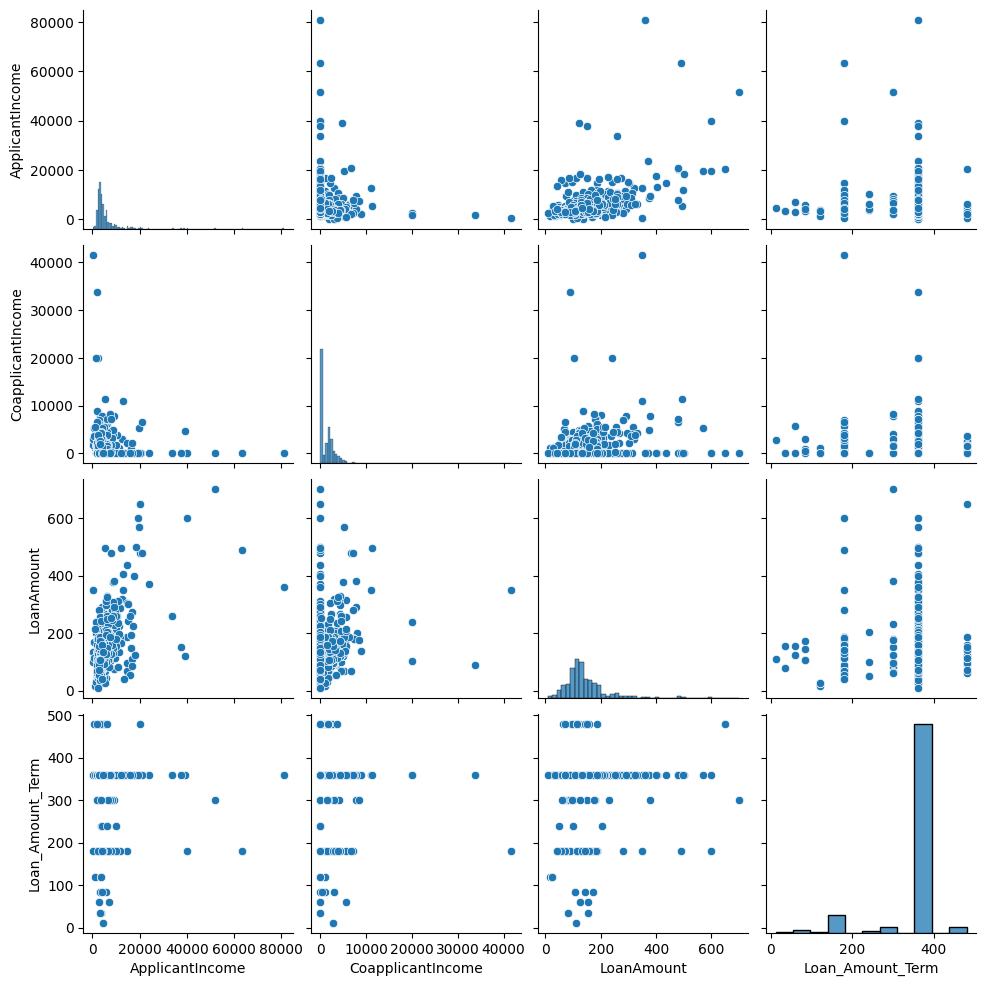

In [93]:
plt.figure(figsize=(10,5))
sns.pairplot(df[["ApplicantIncome", "CoapplicantIncome","LoanAmount","Loan_Amount_Term"]])

Con estas gráficas podemos confirmar de otra manera lo anteriormente mencionado e incluso podemos ver los ouliers

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

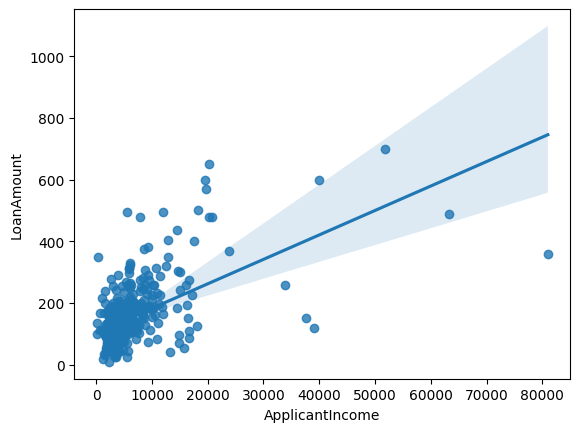

In [94]:
sns.regplot(x = df['ApplicantIncome'], y = df['LoanAmount'], data = df)

Incluso con este estracto podríamos decir que a mayor ingreso por parte del aplicante, podríamos esperar un mejor monto en el préstamo.

## Práctica 5

Los datos siguen estando un poco "sucios" por lo que procederemos con un procesamiento mas profundo

In [95]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [96]:
# Vamos a separar los datos num vs los categoricos

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [97]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [98]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [99]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [100]:
# cat_data
# Vamos a cambiar los Valores Nulos por el dato más cómun

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # falso si ya no hay nulos

False

In [101]:
# num_data
# Vamos a cambiar los Valores Nulos por el dato más cómun

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any()

False

In [102]:
# Vamos a crear clases entre 0 y 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [103]:
# Transformamos la columna objetivo

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [104]:
# Transformamos el resto de variables

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [105]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [106]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [107]:
df = pd.concat([cat_data, num_data, target], axis=1)

In [108]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


## Práctica 7

In [109]:
X = pd.concat([cat_data, num_data], axis=1)
y = target

In [110]:
# Usaremos StratifiedShuffleSplit para dividir los datos teniendo en cuenta que obtendremos la misma proporción en la columna de destino.

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# casi el mismo ratio
print('\nratio del objetivo en y_train :',y_train.value_counts().values/ len(y_train))
print('ratio del objetivo en y_test :',y_test.value_counts().values/ len(y_test))
print('ratio del objetivo en original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio del objetivo en y_train : [0.68635438 0.31364562]
ratio del objetivo en y_test : [0.69105691 0.30894309]
ratio del objetivo en original_data : [0.68729642 0.31270358]


In [111]:
# Nos enfocaremos en los resultados del LogisticRegression pero usaremos de una vez todos los modelos para ver su comportamiento

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [112]:
# Vamos a crear 3 funciones
# Primero la de loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [113]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)

train_eval_train(models, X_train, y_train)


LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.827
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.667
  rec: 0.364
  f1: 0.471
  loss: 9.249
  acc: 0.743
------------------------------
SVC :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 11.158
  acc: 0.690
------------------------------
DecisionTreeClassifier :
  pre: 0.929
  rec: 0.422
  f1: 0.580
  loss: 6.900
  acc: 0.809
------------------------------


Podemos ver que el mejor modelo es LogisticRegression, al menos por ahora, SVC solo está memorizando los datos, por lo que se está sobreajustando.

In [114]:
X_train.shape

(491, 11)

In [115]:
# train_eval_cross

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # cambiaremos X & Y a marco de datos porque usaremos iloc (iloc no funciona en una matriz numpy)
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train])
            y_pred = model.predict(X.iloc[test])
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] porque no queremos que se muestre el nombre de la columna
        print('-'*30)

train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.894048
 rec     0.422500
 f1      0.562733
 loss    7.046902
 acc     0.804490
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.379834
 rec      0.207500
 f1       0.259954
 loss    12.921282
 acc      0.641510
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.525142
 acc      0.680245
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.899785
 acc     0.808571
Name: 0, dtype: float64
------------------------------


SVC solo está memorizando los datos y puede ver que aquí DecisionTreeClassifier es mejor que LogisticRegression

Para entender un mejor esto lo explico a continuación:

In [116]:
x = []
idx = [' pre', ' rec', ' f1', ' loss', ' acc']

# Usaremos solo el modelo de Logistic
log = LogisticRegression()

for train, test in skf.split(X_train, y_train):
    log.fit(X_train.iloc[train], y_train.iloc[train])
    ls = loss(y_train.iloc[test], log.predict(X_train.iloc[test]), retu=True)
    x.append(ls)

# De eso obtenemos este dataframe
pd.DataFrame(x, columns=idx)

,pre,rec,f1,loss,acc
0,0.875000,0.437500,0.583333,7.208731,0.800000
1,0.833333,0.333333,0.476190,8.091432,0.775510
2,0.875000,0.466667,0.608696,6.620263,0.816327
3,0.500000,0.200000,0.285714,11.033771,0.693878
4,1.000000,0.466667,0.636364,5.884678,0.836735
5,0.857143,0.400000,0.545455,7.355848,0.795918
6,1.000000,0.733333,0.846154,2.942339,0.918367
7,1.000000,0.625000,0.769231,4.413509,0.877551
8,1.000000,0.250000,0.400000,8.827017,0.755102
9,1.000000,0.312500,0.476190,8.091432,0.775510


La columna 0 representa la puntuación de precisión de los 10 pliegues.

La fila 0 representa (pre, rec, f1, loss, acc) para el primer pliegue, entonces deberíamos encontrar la media de cada columna

pd.DataFrame(x, columnas=idx).mean(eje=0)

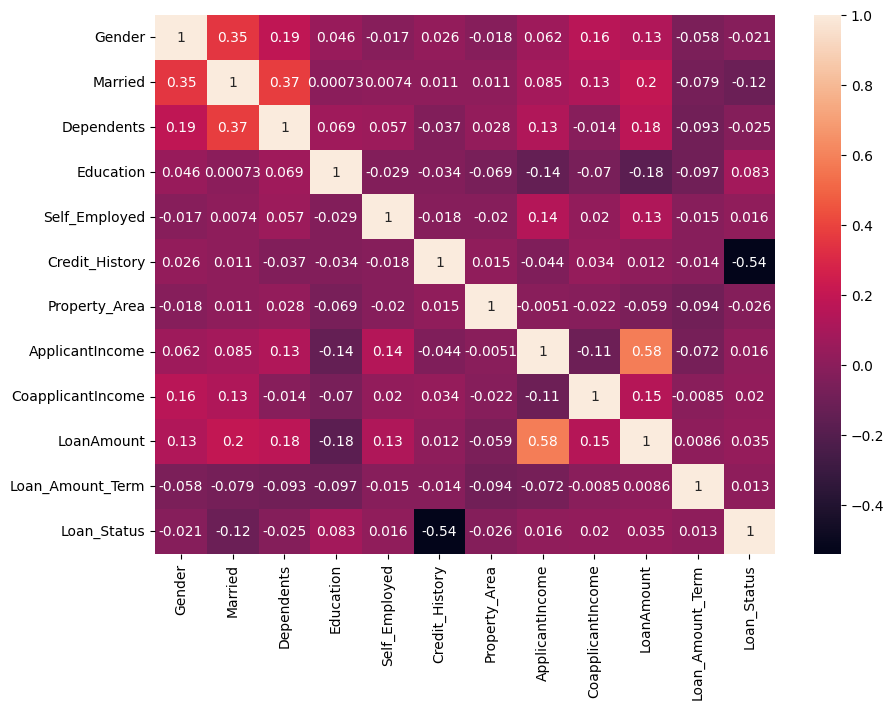

In [117]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);


Vemos como hay una correlación lineal alta con los ingresos y el monto del crédito. Esto es normal debido a la naturaleza del problema.
A mayor capacidad de pago, mayor puede ser el monto del préstamo.

In [118]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
415,0,0,0,0,0,1,2,2995.0,0.0,60.0,360.0
26,1,1,0,0,0,1,1,2799.0,2253.0,122.0,360.0
394,1,1,2,0,0,1,2,3100.0,1400.0,113.0,360.0
584,1,1,1,0,0,0,0,2787.0,1917.0,146.0,360.0
86,1,1,2,1,0,1,1,3333.0,2000.0,99.0,360.0


In [119]:
# Vamos agregar datos al modelo, como por ejemplo un ratio del ingreso del Coaplicante/Aplicante y El Monto del Prestamo * su Plazo

X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term']

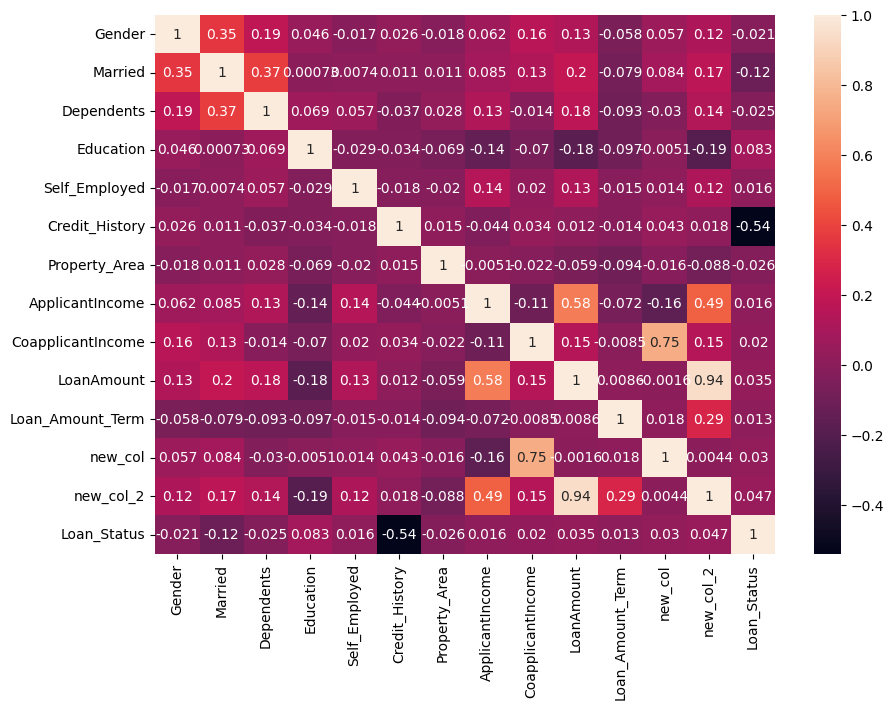

In [120]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

Podemos ver como cambian un poco las correlaciones, esto con fin de que ayude un poco en el Recall del modelo

In [121]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [122]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.304467
 acc      0.686367
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.313095
 rec      0.169167
 f1       0.218420
 loss    13.442076
 acc      0.627061
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.304467
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.899785
 acc     0.808571
Name: 0, dtype: float64
------------------------------


Ok, SVC está mejorando, pero LogisticRegression se está sobreajustando

No quiero cambiar nada para que podamos ver qué sucederá a medida que avancemos.

In [123]:
# Primero, vamos a ver a los recuentos de valores de cada etiqueta.

for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married, dtype: int64
------------------------------------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    428
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    421
0     70
Name: Credit_History, dtype: int64
------------------------------------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
------------------------------------------------
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: new_col, Length: 270, dtype: int64
------------------------------------------------
43200.0     18
3960

Trabajaremos en las características que tienen valores variados.

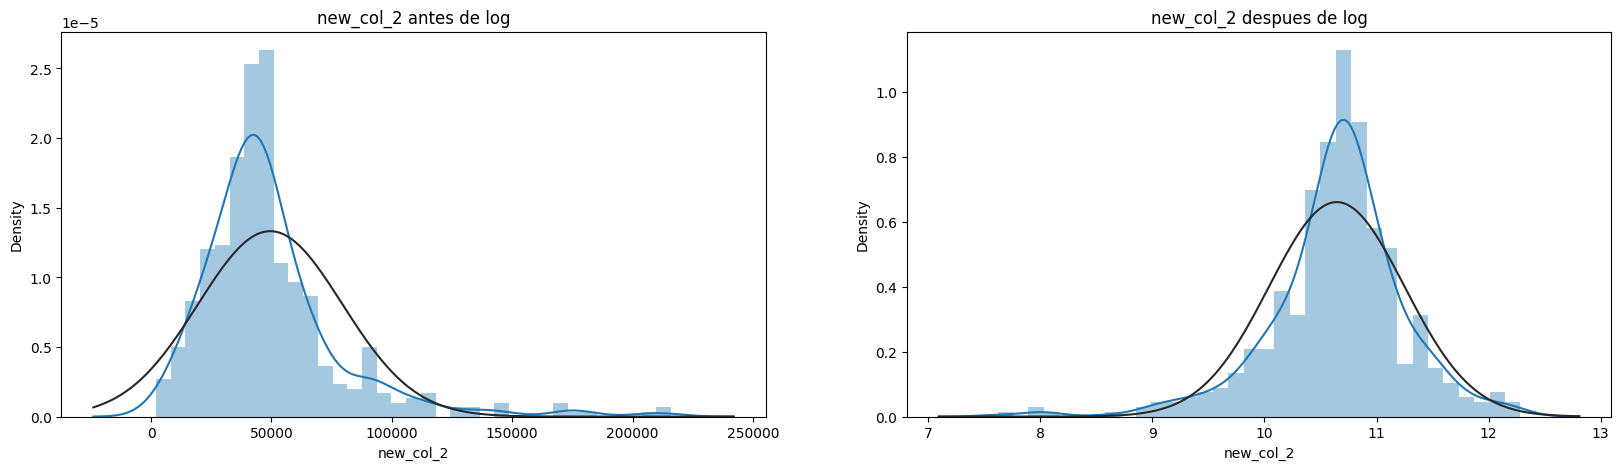

In [124]:
# new_col_2

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 antes de log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # logaritmo de todos los valores

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 despues de log');

Podemos ver que estamos sesgados hacia la derecha

Podemos resolver este problema con técnicas estadísticas muy simples, tomando el logaritmo de todos los valores.

Porque cuando los datos se distribuyen normalmente, ayuda a mejorar nuestro modelo.

In [125]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.899048
 rec     0.429167
 f1      0.569764
 loss    6.899785
 acc     0.808571
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.685278
 rec     0.336667
 f1      0.439734
 loss    9.246300
 acc     0.743469
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.811548
 rec     0.311667
 f1      0.444833
 loss    8.151750
 acc     0.773837
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.899785
 acc     0.808571
Name: 0, dtype: float64
------------------------------


Podemos observar como los modelos mejoran drastricamente solo con el ajuste anterior

In [126]:
# new_col

# La mayor parte de la data es 0, cambiaremos otros valores a 1

print('antes:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\ndespues:')
print(X_train['new_col'].value_counts())

antes:
0.000000    222
0.414374      1
0.441544      1
0.556065      1
0.985459      1
           ... 
0.750075      1
0.964755      1
0.743616      1
5.365854      1
0.859254      1
Name: new_col, Length: 270, dtype: int64
--------------------------------------------------

despues:
1.0    269
0.0    222
Name: new_col, dtype: int64


In [127]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.910714
 rec     0.422500
 f1      0.562606
 loss    6.973344
 acc     0.806531
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.719762
 rec     0.298333
 f1      0.406231
 loss    9.469918
 acc     0.737265
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.819048
 rec     0.324167
 f1      0.458747
 loss    8.003162
 acc     0.777959
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.899785
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [128]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married, dtype: int64
------------------------------------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    428
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    421
0     70
Name: Credit_History, dtype: int64
------------------------------------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    269
0.0    222
Name: new_col, dtype: int64
------------------------------------------------
10.673596    18
10.586584    13
10.961278    11
10.491274    11
10.738134     9
             ..
11.643954     1
10.595634     1
9.856396      1
9.963641      1
12.100712     1
Name: new_

### Por último descartaré outliers y selecionare las mejores carácteristicas para el modelo

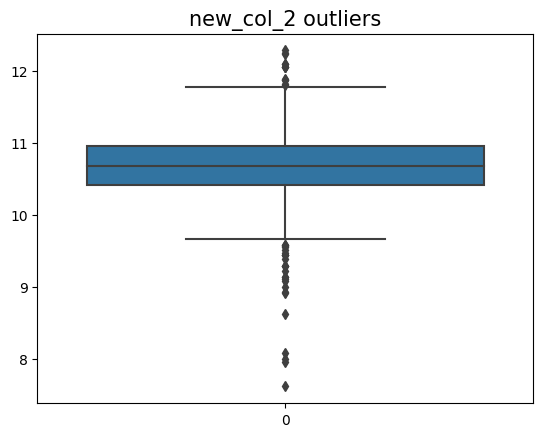

In [129]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [130]:
threshold = 1.5  # este número es un hiperparámetro, por más que lo reduzcas, por más que elimines más puntos
                 # podemos probar diferentes valores. El valor predeterminado es (1.5). Funciona bien en la mayoría de los casos.
                 # no queremos probar con un número pequeño porque puede perder información importante de los datos.


new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.416008100285975 , Quartile 75: 10.961277846683982
iqr: 0.5452697463980076
Cut Off: 0.8179046195970114
Lower: 9.598103480688962
Upper: 11.779182466280993
Nubers of Outliers: 39
outliers:[12.092679958175083, 8.930626469173578, 7.620705086838262, 12.254862809699606, 7.965545573129992, 9.574983485564092, 9.392661928770137, 9.578311275656766, 9.587406005562649, 9.112948025967533, 8.006367567650246, 9.144200569471638, 9.287301413112312, 9.441452092939569, 9.287301413112312, 12.059890135352092, 8.626944055375356, 9.51044496442652, 11.81569317484005, 9.441452092939569, 8.922658299524402, 9.287301413112312, 11.889991098556695, 12.059890135352092, 12.059890135352092, 12.231740392278752, 9.469622969906265, 9.137769679141348, 11.799607037088427, 9.084777149000837, 9.21830854162536, 8.99961934066053, 8.083328608786376, 12.283033686666302, 9.549665677579801, 11.877568578558138, 11.877568578558138, 12.100712129872347, 9.441452092939569]

len X_train before dropping the outliers 491
le

In [131]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

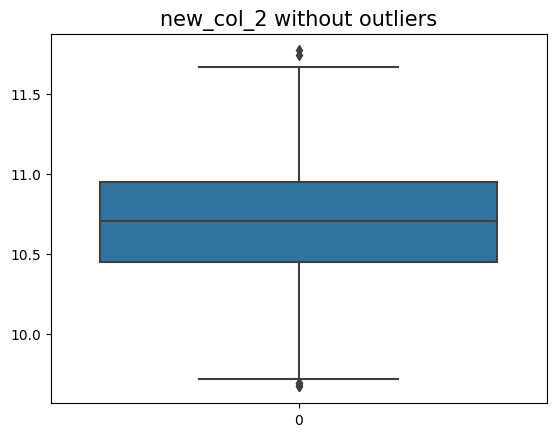

In [132]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

Como podemos ver, desechamos los outliers

In [133]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.907500
 rec     0.442857
 f1      0.587307
 loss    6.703771
 acc     0.814010
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.755873
 rec     0.342857
 f1      0.459636
 loss    8.704455
 acc     0.758502
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.643333
 rec     0.235714
 f1      0.340616
 loss    8.772364
 acc     0.756618
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.920833
 rec     0.442857
 f1      0.589413
 loss    6.623674
 acc     0.816232
Name: 0, dtype: float64
------------------------------


Como podemos ver, el mejor hasta el momento ha sido el Logistic y el Decision Tree, y con este paso de los outliers pudimos subir el Recall

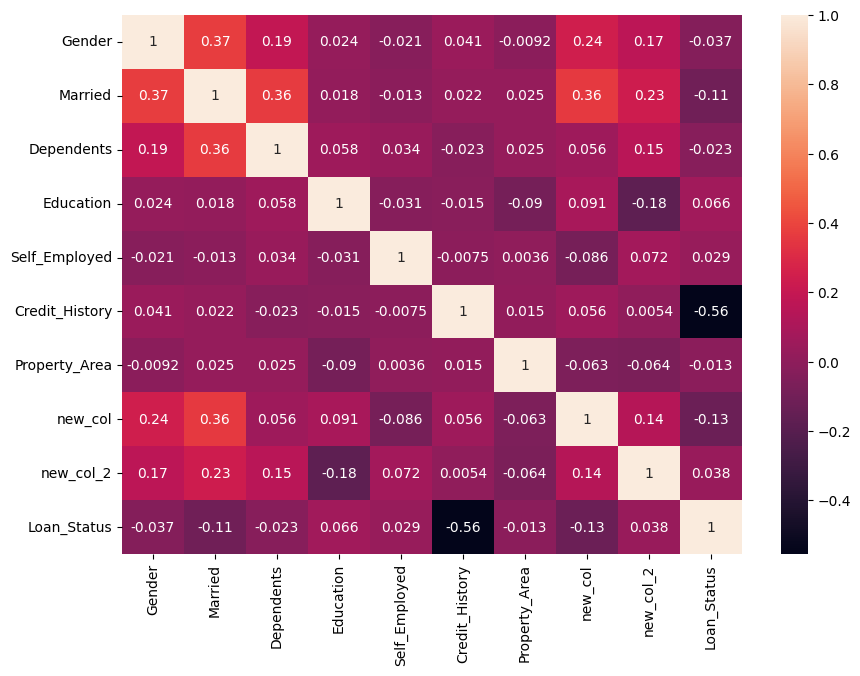

In [134]:
# Voy a quitar Self_Employed debido a que sale muuuy baja la correlación

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [135]:
X_train.drop(['Self_Employed'], axis=1, inplace=True)

train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
 pre     0.907500
 rec     0.442857
 f1      0.587307
 loss    6.703771
 acc     0.814010
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.764275
 rec     0.385714
 f1      0.500336
 loss    8.303970
 acc     0.769614
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.920833
 rec     0.414286
 f1      0.563958
 loss    6.940580
 acc     0.807440
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.920833
 rec     0.442857
 f1      0.589413
 loss    6.623674
 acc     0.816232
Name: 0, dtype: float64
------------------------------


Al parecer Self_Employed no es importante, realmente no se mueve ni la presición ni el recall, incluso el Kneighbors mejoró

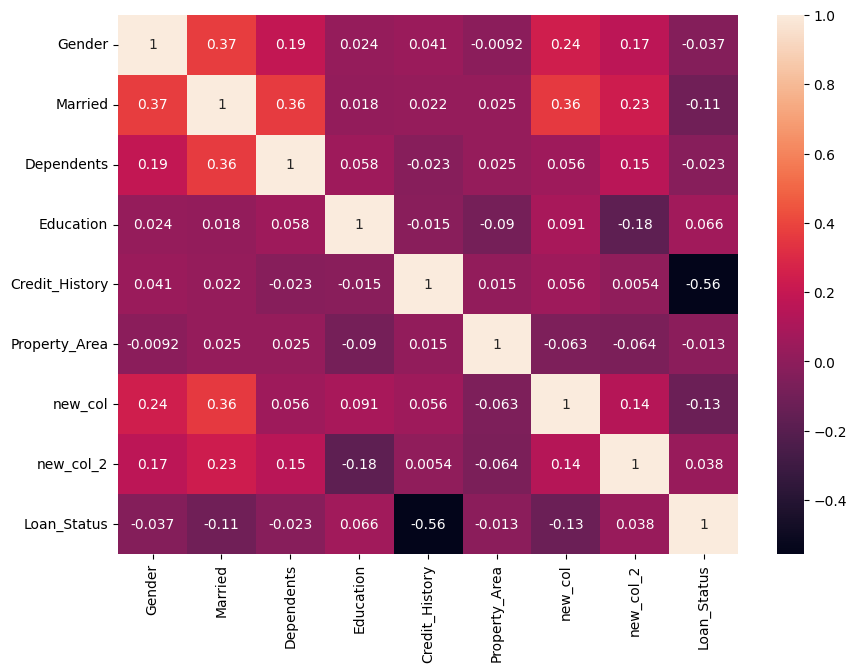

In [136]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

Ya por último haré lo mismo pero para los datos Test

In [137]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
182,1,1,0,0,0,1,1,4600.0,0.0,73.0,180.0
440,1,0,0,0,0,1,1,3660.0,5064.0,187.0,360.0
276,1,1,0,0,0,1,1,3993.0,3274.0,207.0,360.0
533,1,0,1,0,0,1,1,11250.0,0.0,196.0,360.0
504,1,1,0,1,0,1,1,3814.0,1483.0,124.0,300.0


In [138]:
X_test_new = X_test.copy()

In [139]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

X_test_new.drop(['Self_Employed'], axis=1, inplace=True)

In [140]:
X_test_new.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,new_col,new_col_2
182,1,1,0,0,1,1,0.0,9.483416
440,1,0,0,0,1,1,1.0,11.117213
276,1,1,0,0,1,1,1.0,11.218823
533,1,0,1,0,1,1,0.0,11.164219
504,1,1,0,1,1,1,1.0,10.524064


In [141]:
X_train.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,new_col,new_col_2
415,0,0,0,0,1,2,0.0,9.980449
26,1,1,0,0,1,1,1.0,10.690125
394,1,1,2,0,1,2,1.0,10.613492
584,1,1,1,0,0,0,1.0,10.869711
86,1,1,2,1,1,1,1.0,10.481224


In [142]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

LogisticRegression:
  pre: 0.850
  rec: 0.447
  f1: 0.586
  loss: 7.033
  acc: 0.805
----------------------------------------
KNeighborsClassifier:
  pre: 0.652
  rec: 0.395
  f1: 0.492
  loss: 9.084
  acc: 0.748
----------------------------------------
SVC:
  pre: 0.889
  rec: 0.421
  f1: 0.571
  loss: 7.033
  acc: 0.805
----------------------------------------
DecisionTreeClassifier:
  pre: 0.895
  rec: 0.447
  f1: 0.596
  loss: 6.740
  acc: 0.813
----------------------------------------


Bueno, podemos concluir que el Logistic Regression junto con el Decision Tree son los mejores modelos, y aunque procesmos de manera rigurosa la información, es complicado mejorar el Recall del modelo. Creo que es debido a que no hay suficiente información o incluso que hay sesgos en la captura de la misma.